<a href="https://colab.research.google.com/github/amankhashbar/ML-Projects/blob/master/Detecting_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecting Parkinson's Disease

Parkinson's disease is a disorder caused by Nerve cell damage in the brain which causes dopamine levels to drop, leading to shaking, stiffness, and difficulty with walking, balance, and coordination.

The diagnosis of Parkinson's Disease is a challenging task, no specific test exists to diagnose Parkinson's disease. A doctor trained in nervous system conditions (neurologist), diagnoses Parkinson's disease based on the patient's medical history, a review of the signs and symptoms, and a neurological and physical examination.

![alt text](https://i.dailymail.co.uk/1s/2019/06/19/13/14984416-7158327-Researchers_from_King_s_College_London_discovered_that_damage_to-a-23_1560948824142.jpg)

Various ongoing studies have shown that speech is a carrier of information relevant to the differential diagnosis of Parkinson's disease. Researchers have tried to extract of interest features from speech samples of PD patients. Using digital signal processing and machine learning, such biomarkers can be used for a differential diagnosis of Parkinson's disease. 

Results give evidence that diagnostic reliability is similar to the current studies based on clinical suspicion, which might be supported by new tools to objectively evaluate the presence of deviations in patient's motor capabilities.

Researcher Dr. Carlos J. Parez from Departament of Mathematics, Universidad de Extremadura, Spain extracted acoustic features from 3 voice recording replications of the sustained phonation, for 80 subjects, 40 of which are PD patients. 

The 44 extracted acoustic features, can be classified into five families: pitch local perturbation measures, amplitude local perturbation measures, noise features, spectral envelope measures and nonlinear ones. Four pitch local perturbation measures were also obtained. 


Using these features, a dataset was created which we will be using for this project. We'll be using XGBoost, an open-source software library which provides us a easy to use gradient boosting framework, based on decision trees in Python.

##Importing relevant libraries

In this Python machine learning project, we will be using the Python libraries scikit-learn, numpy, pandas, and xgboost, to build a model using an XGBClassifier. We’ll load the data, get the features and labels, scale the features, then split the dataset, build an XGBClassifier, and then calculate the accuracy of our model.

In [22]:
!pip install numpy pandas sklearn xgboost

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import io
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

##Importing the dataset

We'll be using the [UCI ML Parkinsons dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/) in this project. The dataset has 24 columns and 195 records.

In [11]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
# df.head()
# df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


##Selecting the features and labels from the dataframe.

The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

Shape of features matrix: (195, 22)
Shape of labels matrix: (195,)


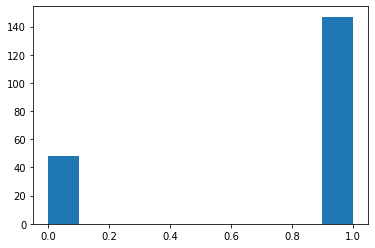

We have 147 ones and 48 zeros in the status column in our dataset.


In [37]:
features = df.loc[:,df.columns!='status'].values[:,1:]
labels = df.loc[:,'status'].values
# labels = np.reshape(labels,(labels.size, 1))

print('Shape of features matrix: ' + str(features.shape))
print('Shape of labels matrix: ' +str(labels.shape))

plt.hist(labels)
plt.show()

print(f'We have {labels[labels==1].shape[0]} ones and {labels[labels==0].shape[0]} zeros in the status column in our dataset.')


## Aplying feature scaling and splitting the dataset

The dataset contains features highly varying in magnitudes, units and range. So we need to bring all features to the same level of magnitudes using feature scaling.

We'll initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them.

In [38]:
scaler=MinMaxScaler((-1,1))
X = scaler.fit_transform(features)
y=labels

##Traning the model

Initialize an XGBClassifier.

In [39]:
model = XGBClassifier()

##Making predictions and calculating the accuracy

We'll be using 5 fold cross validation to measure the accuracy of our model.


In [50]:
from sklearn.model_selection import cross_val_score

xgb_scores = cross_val_score(model, X, y, cv = 5)

accuracy = sum(xgb_scores)/len(xgb_scores)

print(f'The accuracy of our model is {round(accuracy*100, 2)}%')


The accuracy of our model is 81.54%


## References

[Analysis of speaker recognition methodologies and the influence of kinetic changes to automatically detect Parkinson's Disease](https://www.sciencedirect.com/science/article/abs/pii/S1568494617306634)* By **Velázqueza Jorge** and **Andrés Gómez GarcíaaJuan**

[Towards an early diagnosis of Parkinson’s disease from the speech](http://www.upm.es/internacional/UPM/UPM_Channel/Research_News?id=26019d28a6b41610VgnVCM10000009c7648a____&fmt=detail&prefmt=articulo) by **UNIVERSIDAD POLITÉCNICA DE MADRID**

[Parkinson's Diesease replicated acoustic features dataset](https://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+) from UCI ML Repository